# Trabajo Práctico Final

# Grupo 10
### Integrantes:
- Facundo Peloso
- Eduardo Barbas
- Roberto Biancardi 
- Juan Pablo Anselmo

El objetivo de este trabajo práctico es implementar modelos de regresión categórica que nos permita resolver problemas de clasificación.

Para ello utilizaremos un dataset "propio", es decir, fue seleccionado por los integrantes de nuestro grupo.

El dataset elegido fue ..

Estos datos describen....características del mismo como:

La variable target elegida es la de **Inserte Target**.



## 0. Importación de Módulos y Librerías

In [1]:
#Importacion de librerias/módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option("display.max_columns", None)



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm
from statsmodels.tools import eval_measures

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## 1. Lectura de Datos

In [3]:
#Establezco la dirección del archivo
file_location="twic_master.csv"

#Leo el data set usando la librería pandas
# y se almacena en el objeto Dataframe llamado datos_crudos  
datos_crudos=pd.read_csv(file_location, index_col=0)

c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (10,13,14,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
datos_crudos.head()

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
twic_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,1.41095e+07,1.50301e+06,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2.01619e+06,4.6115e+06,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1.51004e+06,2.41016e+07,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,2.41307e+07,4.11534e+06,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,1.33025e+07,1.33005e+07,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datos_crudos.columns

Index(['White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'WhiteTeam', 'BlackTeam', 'EventType',
       'FEN', 'SetUp', 'Variant', 'Board', 'PlyCount', 'EventCategory'],
      dtype='object')

In [6]:
datos_crudos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971319 entries, 1260 to 980
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   White           object 
 1   Black           object 
 2   Date            object 
 3   EventDate       object 
 4   Event           object 
 5   Result          object 
 6   mainline_moves  object 
 7   Site            object 
 8   Online          bool   
 9   Round           object 
 10  ECO             object 
 11  Opening         object 
 12  WhiteFideId     object 
 13  BlackFideId     object 
 14  WhiteElo        float64
 15  BlackElo        float64
 16  Variation       object 
 17  WhiteTitle      object 
 18  BlackTitle      object 
 19  WhiteTeam       object 
 20  BlackTeam       object 
 21  EventType       object 
 22  FEN             object 
 23  SetUp           float64
 24  Variant         object 
 25  Board           float64
 26  PlyCount        float64
 27  EventCategory   float64
dtypes: bool(1), f

In [7]:
datos_crudos.mainline_moves.value_counts()

1. e4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            2241
1. d4                                                                                                                                                                                                                                                                             

In [8]:
datos_crudos.EventType.value_counts()

team                  80476
swiss                 54121
blitz                 17099
team-tourn             9880
tourn                  9488
rapid                  7267
team-swiss             3788
k.o.                   2977
swiss (blitz)          2188
k.o. blitz              915
Team                    495
swiss (rapid)           485
team-match              400
team-tourn (rapid)      362
match                   334
schev                   320
match (blitz)           207
tourn (blitz)           197
tourn (rapid)           197
match (rapid)           158
k.o. (blitz)            150
team-swiss (rapid)      112
team (rapid)            109
team-match (blitz)       94
tourn (corr)             91
team-                    80
team-schev (blitz)       64
schev (rapid)            64
schev (blitz)            40
team-schev (rapid)       32
team-match (rapid)       22
k.o. rapid               17
team-k.o.                16
simul                    15
game (blitz)              1
game                

In [9]:
datos_crudos.Date.iloc[0]

'2018-12-26'

In [10]:
datos_crudos["Fecha"] = pd.to_datetime(datos_crudos["Date"])

In [11]:
datos_crudos['Fecha'].iloc[0]

Timestamp('2018-12-26 00:00:00')

In [12]:
datos_crudos['Fecha'].value_counts()

2021-02-16    6185
2020-05-16    5749
2020-06-14    5079
2021-03-13    4826
2022-08-02    3780
              ... 
2012-06-04       1
2012-05-05       1
2012-05-03       1
2012-05-06       1
1988-11-18       1
Name: Fecha, Length: 3800, dtype: int64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.66110e+05, 6.17038e+05, 9.00552e+05, 2.87616e+05, 1.00000e+00]),
 array([ 6896. ,  8397.8,  9899.6, 11401.4, 12903.2, 14405. , 15906.8,
        17408.6, 18910.4, 20412.2, 21914. ]),
 <BarContainer object of 10 artists>)

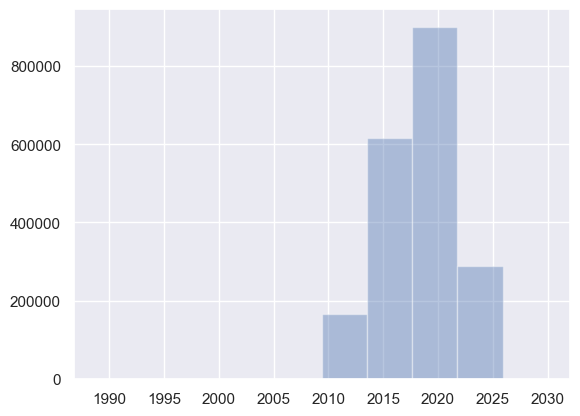

In [13]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(datos_crudos['Fecha'], label='fechas', alpha = 0.4)

In [14]:
datos_crudos.shape

(1971319, 29)

In [15]:
datos=datos_crudos.loc[datos_crudos['Fecha'].dt.year>2021]

In [16]:
datos.shape

(226061, 29)

In [17]:
datos.head()

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Fecha
twic_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1424,"Nakamura,Hi","Rapport,R",2022-02-12,2022.02.12,FIDE Grand Prix 1 Playoff,1-0,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. cxd5 exd5 5. B...,Berlin GER,False,1.1,D36,QGD,2.01619e+06,738590,2736.0,2763.0,"exchange, positional line, 6.Qc2",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-12
1424,"Aronian,L","Dominguez Perez,L",2022-02-12,2022.02.12,FIDE Grand Prix 1 Playoff,1-0,1. d4 d5 2. c4 dxc4 3. e4 b5 4. a4 c6 5. axb5 ...,Berlin GER,False,1.1,D20,QGA,1.33005e+07,3.50324e+06,2772.0,2752.0,3.e4,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-12
1424,"Rapport,R","Nakamura,Hi",2022-02-13,2022.02.12,FIDE Grand Prix 1 Playoff,1/2-1/2,1. Nf3 d5 2. g3 Nf6 3. Bg2 e6 4. O-O Be7 5. d3...,Berlin GER,False,1.2,A07,Reti,738590,2.01619e+06,2763.0,2736.0,King's Indian attack (Barcza system),GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-13
1424,"Dominguez Perez,L","Aronian,L",2022-02-13,2022.02.12,FIDE Grand Prix 1 Playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Be7 5. O-...,Berlin GER,False,1.2,C55,Two knights defence (Modern bishop's opening),3.50324e+06,1.33005e+07,2752.0,2772.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-13
1424,"Nakamura,Hi","Aronian,L",2022-02-15,2022.02.12,FIDE Grand Prix 1 Playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,Berlin GER,False,2.1,C88,Ruy Lopez,2.01619e+06,1.33005e+07,2736.0,2772.0,"closed, 7...O-O",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-15


In [18]:
def condition(x):
    if x=='1-0':
        return 0
    elif x=='0-1':
        return 1
    elif x=='1/2-1/2':
        return 2
    else: 
        return np.NaN
 
# Applying the conditions
datos['Resultado'] = datos['Result'].apply(condition)
 
#print(df)

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_16388\3252946653.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Resultado'] = datos['Result'].apply(condition)


In [19]:
#Creo columna resultado 
#datos['Resultado'] = datos['Result'].apply(lambda x: 0 if x=='1-0' else if x=='0-1' )

In [20]:
datos['Resultado'].isna().sum()

9

In [21]:
datos['mainline_moves'].iloc[0]

'1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. cxd5 exd5 5. Bg5 c6 6. Qc2 Be7 7. e3 Nbd7 8. Bd3 Nh5 9. Bxe7 Qxe7 10. O-O-O Nb6 11. h3 g6 12. Nf3 Ng7 13. g4 Be6 14. Ne2 O-O-O 15. Kb1 Kb8 16. Rc1 Ne8 17. Nf4 Nd6 18. a4 Ndc4 19. a5 Qb4 20. Qc3 Qxa5 21. Qxa5 Nxa5 22. Ng5 Rdf8 23. Bxg6 Nb3 24. Nfxe6 fxe6 25. Nxh7 Rfg8 26. Bd3 Nxc1 27. Kxc1 Rg7 28. Nf6 Rf7 29. g5 Rxf6 30. gxf6 Rf8 31. h4 Rxf6 32. h5 Rh6 33. Kd2 Kc7 34. Ke2 Kd6 35. Kf3 Ke7 36. Kg4 Kf6 37. Rh3 Nc8 38. Rf3+ Kg7 39. Bg6 Nd6 40. Kg5 a5 41. Rf4 Ne4+ 42. Bxe4 dxe4 43. Rxe4 Rf6 44. f4 Rf5+ 45. Kg4 Rb5 46. Rxe6 a4 47. Re7+ Kh6 48. Re8 Rxb2 49. Rh8+ Kg7 50. Ra8 b5 51. e4 Ra2 52. Ra7+ Kh6 53. Ra6 Kh7 54. Ra7+ Kh6 55. Ra6 Kh7 56. e5 b4 57. e6 b3 58. Kf5 Ra1 59. Rb6 Re1 60. Kf6 Re4 61. e7 Rxf4+ 62. Ke5 Rf1 63. Kd6 Re1 64. Kd7 c5 65. dxc5 Rd1+ 66. Kc7 Re1 67. Kd6 Rd1+ 68. Kc6 Re1 69. Rb4 b2 70. Rxb2 Rxe7 71. Ra2'

In [22]:
type(datos['mainline_moves'].iloc[0])

str

In [23]:
#aux=datos['mainline_moves'].iloc[0].replace(" ", "")
moves_serie=datos['mainline_moves'].iloc[0].replace(" ", "").split('.')


In [24]:
#deberia remover los espacioes en blanco del string. luego separar por puntos

In [25]:
len(moves_serie)

72

In [26]:
def cant_move(x):
    if type(x) is str:
        return len(x.replace(" ", "").split('.'))
    else:
        return np.NaN
# Applying the conditions
datos['cant_mov'] = datos['mainline_moves'].apply(cant_move)

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_16388\3200335042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['cant_mov'] = datos['mainline_moves'].apply(cant_move)


In [27]:
datos.head()

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Fecha,Resultado,cant_mov
twic_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1424,"Nakamura,Hi","Rapport,R",2022-02-12,2022.02.12,FIDE Grand Prix 1 Playoff,1-0,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. cxd5 exd5 5. B...,Berlin GER,False,1.1,D36,QGD,2.01619e+06,738590,2736.0,2763.0,"exchange, positional line, 6.Qc2",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-12,0.0,72.0
1424,"Aronian,L","Dominguez Perez,L",2022-02-12,2022.02.12,FIDE Grand Prix 1 Playoff,1-0,1. d4 d5 2. c4 dxc4 3. e4 b5 4. a4 c6 5. axb5 ...,Berlin GER,False,1.1,D20,QGA,1.33005e+07,3.50324e+06,2772.0,2752.0,3.e4,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-12,0.0,42.0
1424,"Rapport,R","Nakamura,Hi",2022-02-13,2022.02.12,FIDE Grand Prix 1 Playoff,1/2-1/2,1. Nf3 d5 2. g3 Nf6 3. Bg2 e6 4. O-O Be7 5. d3...,Berlin GER,False,1.2,A07,Reti,738590,2.01619e+06,2763.0,2736.0,King's Indian attack (Barcza system),GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-13,2.0,31.0
1424,"Dominguez Perez,L","Aronian,L",2022-02-13,2022.02.12,FIDE Grand Prix 1 Playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Be7 5. O-...,Berlin GER,False,1.2,C55,Two knights defence (Modern bishop's opening),3.50324e+06,1.33005e+07,2752.0,2772.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-13,2.0,32.0
1424,"Nakamura,Hi","Aronian,L",2022-02-15,2022.02.12,FIDE Grand Prix 1 Playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,Berlin GER,False,2.1,C88,Ruy Lopez,2.01619e+06,1.33005e+07,2736.0,2772.0,"closed, 7...O-O",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-15,2.0,55.0


In [28]:
data=datos[['WhiteElo','BlackElo','Opening','Variation','Resultado','cant_mov']] 

In [29]:
data=data.dropna(axis=0)

In [30]:
#data['cant_mov']=data['mainline_moves']

# Pruebo modelos para predecir Resultado

In [31]:
X = data[['WhiteElo','BlackElo','Opening','Variation','cant_mov']]

#Vector Target
y = data.Resultado


In [32]:
#Hago dummies
## hago dummies de barrios y tipo de propiedad
#from sklearn.preprocessing import OneHotEncoder
#categoricals = ['Opening', 'Variation']
#enc = OneHotEncoder(drop='first')
#X = listings_modelo[categoricals]
#enc.fit(X)
#enc.categories_

In [33]:
#enc=OneHotEncoder(drop='first')

In [34]:
#X_d=data[categoricals]

In [35]:
#X_d.head(2)

In [36]:
#enc.fit(X_d)
#enc.categories_

In [37]:
'''dummies = enc.transform(X_d).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i !=0]
dummies_df.columns = col_names_drop_first
#dummies_df'''

"dummies = enc.transform(X_d).toarray()\ndummies_df = pd.DataFrame(dummies)\ncol_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))]\ncol_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i !=0]\ndummies_df.columns = col_names_drop_first\n#dummies_df"

In [38]:
#dummies_df.head()

In [39]:
#X_dum = X.drop(categoricals, axis=1)
#X = pd.concat([X_dum, dummies_df], axis=1)

In [40]:
#X = pd.concat([X_dum, dummies_df], axis=1)

In [41]:
#MaskDummies3 = datos['barrio'].isin(ListDummies)
#datosDummies = pd.get_dummies(datos[MaskDummies3]['barrio'])
#datos = pd.merge(datos, datosDummies, how='left', left_index=True, right_index=True)
#datos

#pd.get_dummies(data=df, columns=['A', 'B'])

X_dum=pd.get_dummies(data=X,columns=['Opening','Variation'])

In [42]:
X_dum.head(5)

,WhiteElo,BlackElo,cant_mov,Opening_Alekhine's defence,Opening_Benko gambit,Opening_Benko's opening,Opening_Benoni,Opening_Bird,Opening_Bird's opening,Opening_Bishop's opening,Opening_Blackmar-Diemer,Opening_Budapest,Opening_Caro-Kann,Opening_Catalan,Opening_Centre game,Opening_Czech Benoni,Opening_Danish gambit,Opening_Dutch,Opening_Dutch defence,Opening_English,Opening_English opening,Opening_Evans gambit,Opening_Four knights,Opening_French,Opening_Giuoco Pianissimo,Opening_Giuoco Piano,Opening_Giuoco piano,Opening_Grob,Opening_Gruenfeld,Opening_Gruenfeld defence,Opening_Hungarian defence,Opening_KGA,Opening_KGD,Opening_KP,Opening_King's Indian,Opening_Latvian,Opening_Modern defence,Opening_Nimzo-Indian,Opening_Nimzovich-Larsen attack,Opening_Old Benoni,Opening_Old Indian,Opening_Petrov,Opening_Philidor,Opening_Pirc,Opening_Polish,Opening_Ponziani,Opening_QGA,Opening_QGD,Opening_QGD Slav,Opening_QGD Slav accepted,Opening_QGD Slav defence,Opening_QGD semi-Slav,Opening_QP counter-gambit,Opening_Queen's Indian,Opening_Queen's pawn,Opening_Reti,Opening_Reti accepted,Opening_Robatsch defence,Opening_Ruy Lopez,Opening_Scandinavian,Opening_Scotch,Opening_Scotch gambit,Opening_Sicilian,Opening_Three knights,Opening_Vienna,Opening_Vienna gambit,Opening_two knights,Opening_two knights defence,Variation_'Frankenstein-Dracula' variation,Variation_...b5 & ...d6,Variation_150 attack,Variation_2...Nf6,"Variation_2.c3, Heidenfeld variation",Variation_3...Nf6,Variation_3.Nc3,Variation_3.Nd2,Variation_3.Nf3,Variation_3.e4,Variation_3.g3,"Variation_3.g3, counterthrust variation",Variation_4...e6,Variation_4.Bf4,Variation_4.Bg5,Variation_4.Bg5 Be7,"Variation_4.Bg5 Be7, 5.e3 O-O",Variation_4.Bg5 Nbd7,Variation_4.Nc3,"Variation_4.Nc3, main line",Variation_4.Nf3,Variation_4.e3,Variation_4.e3 Bf5,Variation_4.e3 O-O,"Variation_4.e3 O-O, 5.Bd3","Variation_4.e3 O-O, 5.Bd3 d5",Variation_4.e3 c5,"Variation_4.e3 c5, 5.Ne2 (Rubinstein)","Variation_4.e3 e8g8, 5.Nf3 d7d5","Variation_4.e3 e8g8, 5.Nf3, without ...d5","Variation_4.e3, Botvinnik system","Variation_4.e3, Bronstein (Byrne) variation","Variation_4.e3, Gligoric system with 7...dc","Variation_4.e3, Gligoric system, Bronstein variation","Variation_4.e3, Keres variation","Variation_4.e3, Ragozin variation","Variation_4.e3, Taimanov variation","Variation_4.e3, main line","Variation_4.e3, main line with ...b6","Variation_4.e3, main line with ...c5","Variation_4.e3, main line with 7...Nc6","Variation_4.e3, main line with 8...Bxc3",Variation_4.e4,Variation_4.g3,Variation_4.g3 Bb7,Variation_5...Be7,Variation_5...Nd7,Variation_5...c6,Variation_5.Be2,Variation_5.Bf4,Variation_5.Bg5,Variation_5.Bg5 dc,Variation_5.Nf3,Variation_5.O-O,Variation_5.e3,Variation_5.e3 (Alekhine variation),Variation_6.Bd3,Variation_6.Be2,Variation_6.Nf3,Variation_6.e4,Variation_7.Bc4,Variation_7.e4,"Variation_Abbazia defence (classical defence, modern defence)","Variation_Abbazia defence, modern variation",Variation_Adler variation,Variation_Adorjan defence,Variation_Agincourt variation,Variation_Alapin variation,Variation_Alapin's variation (2.c3),Variation_Alapin-Steinitz variation,Variation_Albin counter-gambit,"Variation_Albin counter-gambit, 5.g3","Variation_Albin counter-gambit, Alapin variation","Variation_Albin counter-gambit, Balogh variation","Variation_Albin counter-gambit, Lasker trap",Variation_Albin-Alekhine-Chatard attack,"Variation_Albin-Alekhine-Chatard attack, Breyer variation","Variation_Albin-Alekhine-Chatard attack, Maroczy variation","Variation_Albin-Alekhine-Chatard attack, Spielmann variation","Variation_Albin-Alekhine-Chatard attack, Teichmann variation",Variation_Alekhine defence,"Variation_Alekhine defense, Borisenko-Furman variation",Variation_Alekhine gambit,Variation_Alekhine variation,"Variation_Alekhine variation, Balogh gambit","Variation_Alekhine, Abonyi variation",Variation_Allgaier gambit,"Variation_Anderssen (Paulsen, Suhle) counter-attack",Variation_Anderssen variation,Variation_Andersson variat

In [43]:
y.value_counts()

0.0    59742
1.0    49491
2.0    29940
Name: Resultado, dtype: int64

Separo en Train y Test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=1, stratify=y)

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=1)#, stratify=y)

In [46]:
y_test.value_counts()

0.0    11949
1.0     9898
2.0     5988
Name: Resultado, dtype: int64

In [47]:
y_test.value_counts()/y_test.size

0.0    0.429280
1.0    0.355595
2.0    0.215125
Name: Resultado, dtype: float64

Funcion para evaluar

In [48]:
# Funcion para Scores

resultados_fin = pd.DataFrame()

def evaluacion(y_test, y_pred, model=""):
    # Crear diccionario para almacenar los resultados
    resultados = {}

    # Calcular sensibilidad
    sensibilidad = metrics.recall_score(y_test, y_pred, average='macro')
    resultados['Sensibilidad'] = round(sensibilidad,2)

    # Calcular accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    resultados['Accuracy'] = round(accuracy,2)

    # Calcular precision
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    resultados['Precision'] = round(precision,2)

    # Calcular F1 score
    f1_score = metrics.f1_score(y_test, y_pred, average='macro')
    resultados['F1 Score'] = round(f1_score,2)

    # Graficar matrix de confusion con heatmap
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_test).tolist(), yticklabels=np.unique(y_pred).tolist())
    plt.title(f'Matrix de Confusion {model}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    resultado_df = pd.DataFrame.from_dict(resultados, orient='index', columns=[model])
    resultados_fin[model]= resultado_df 
    return resultados_fin.transpose().reset_index().rename(columns={"index": "Modelos"})

Regresion Logistica

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, random_state=1)

lr.fit(X_train, y_train) 

ypred_lr_train = lr.predict(X_train)
ypred_lr_test = lr.predict(X_test)


In [50]:
metrics.confusion_matrix(y_train, ypred_lr_train)

array([[36588, 11205,     0],
       [13989, 25604,     0],
       [13652, 10300,     0]], dtype=int64)

In [51]:
metrics.accuracy_score(y_train,ypred_lr_train)

0.5585873646014837

In [52]:
metrics.accuracy_score(y_test,ypred_lr_test)

0.5605173342913597

In [53]:
metrics.recall_score(y_test, ypred_lr_test, average='macro')

0.4724997552658677

In [54]:
metrics.precision_score(y_test, ypred_lr_test, average='macro')

c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.37260724387506966

In [55]:
metrics.f1_score(y_test, ypred_lr_test, average='macro')

0.4162450918580671

In [56]:
metrics.confusion_matrix(y_test, ypred_lr_test)

array([[9156, 2793,    0],
       [3452, 6446,    0],
       [3477, 2511,    0]], dtype=int64)

Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)


ypred_gnb_train = gnb.predict(X_train)


ypred_gnb_test = gnb.predict(X_test)

In [58]:
metrics.confusion_matrix(y_train, ypred_gnb_train)

array([[ 7408,  7733, 32652],
       [ 4201,  8771, 26621],
       [ 1978,  3049, 18925]], dtype=int64)

In [59]:
metrics.confusion_matrix(y_test, ypred_gnb_test)

array([[1669, 2078, 8202],
       [1201, 1947, 6750],
       [ 551,  839, 4598]], dtype=int64)

In [60]:
print('acuracy', metrics.accuracy_score(y_test,ypred_gnb_test))
print('recall',metrics.recall_score(y_test, ypred_gnb_test, average='macro'))
print('precision',metrics.precision_score(y_test, ypred_gnb_test, average='macro'))
print('f1',metrics.f1_score(y_test, ypred_gnb_test, average='macro'))

acuracy 0.29509610202981856
recall 0.3680841457419315
precision 0.3744495629810955
f1 0.2803508524832779


### Knn

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparametros
parameters_knn = {"n_neighbors" : list(range(1, 15))}

clf_knn = GridSearchCV(knn, 
                   param_grid = parameters_knn, 
                   refit = True, 
                   cv = 3,
                   verbose=1,
                   n_jobs = -1)
                   

# Fit el modelo ya seleccionado
clf_knn.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
print("Los mejores parametros fueron %s con un score de %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

Los mejores parametros fueron {'n_neighbors': 14} con un score de 0.54


In [ ]:
ypred_knn_train = clf_knn.predict(X_train)
ypred_knn_test = clf_knn.predict(X_test)

In [ ]:
print('acuracy', metrics.accuracy_score(y_train,ypred_knn_train))
print('recall',metrics.recall_score(y_test, ypred_knn_test, average='macro'))
print('precision',metrics.precision_score(y_test, ypred_knn_test, average='macro'))
print('f1',metrics.f1_score(y_test, ypred_knn_test, average='macro'))

acuracy 0.5955109666061902
recall 0.47491281423212
precision 0.4890742104672768
f1 0.46033140003847817


In [ ]:
tree_model = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=6, random_state=50)
tree_model.fit(X_train, y_train)

y_train_tree_predict = tree_model.predict(X_train)
y_test_tree_predict = tree_model.predict(X_test)

print('resultados de train')
print(accuracy_score(y_train, y_train_tree_predict))
print(confusion_matrix(y_train, y_train_tree_predict))

print('resultados de test')
print(accuracy_score(y_test, y_test_tree_predict))
print(confusion_matrix(y_test, y_test_tree_predict))

resultados de train
0.5718532756112019
[[36765 10395   633]
 [15007 24100   486]
 [12503  8645  2804]]
resultados de test
0.5682414226693012
[[9151 2624  174]
 [3719 6039  140]
 [3257 2104  627]]


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_tree = tree.DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=bagging_tree, n_estimators=1000,
                                bootstrap=True, n_jobs=1, random_state=50)
bagging_clf.fit(X_train, y_train)

print(accuracy_score(y_train, bagging_clf.predict(X_train)))
print(confusion_matrix(y_train, bagging_clf.predict(X_train)))

print(accuracy_score(y_test, bagging_clf.predict(X_test)))
print(confusion_matrix(y_test, bagging_clf.predict(X_test)))

KeyboardInterrupt: 